# Coding Dojo Working Notebook: Plotting Jet Kinematic Variables

## Jet Basics

Protons are composed of gluons and quarks. When protons collide at high eneries at the LHC, these consituents can fly apart. However, due to a principle called color confinment which dictates that color-charged particles such as quarks and gluons cannot be in isolation, these free quarks/gluons undergo a process called hadronization in which they combine with quarks and antiquarks spontaneously created from the vacuum, thus producing color-neutral particles.

This hadronization process results in a shower of particles known as a jet. To distinguish between particles that come from quarks/gluons (jets) and those from other processes, we employ clustering algorithms which compute a measure of distance and combine particles that meet specific criteria. The measure of distance between a pair of particles is given by:

$$
d_{ij} = \min\left(p_{ti}^{2p}, p_{tj}^{2p}\right)\frac{\Delta R_{ij}^2}{R^2}
$$

Particles are combined if $d_{ij} < d_{iB}$ and the iteration process stops once $d_{ij}>d_{iB}$. The parameter $p$ depends on the algorithm being used:
* KT algorithm: $p=1$
* Cambridge Aachen algorithm (CA): $p=0$
* antiKT (AK) algorithm: $p=-1$

For the anti-KT algorithm, jet cones can have one of two radii: $R=0.8$ for AK8 ("fat jets") and $R=0.4$ for AK4.

In this Coding Dojo, you will be plotting the kinematic variables of AK4 jets, namely the mass, the $p_T$, the pseudotapidity ($\eta$) and the azimuthal angle ($\phi$).

## Setup

If you do not already have the data, go back to your terminal and do so. (Hint: Look up what `wget` does and how it works.)

## Instructions
For AK4 jets, plot histograms for each of the kinematic variables using the tools specified in the following table.

<table>
  <tr>
    <th>AK4 Jet Kinematic Variable</th>
    <th>Tools to Plot With</th>
  </tr>
  <tr>
    <td>Jet eta</td>
    <td>PyROOT</td>
  </tr>
  <tr>
    <td>Jet phi</td>
    <td>RDataFrame</td>
  </tr>
  <tr>
    <td>Jet pt</td>
    <td>Uproot, Hist</td>
  </tr>
  <tr>
    <td>Jet mass</td>
    <td>Matplotlib</td>
  </tr>
</table>

If you finish before time is up, there is an extra exercise

## Hints:
1. Check the content of data.root (e.g. What is the name of the TTree?)
    - The file contains multipe TTrees
    - Only the **first** one is relavent to this exercise
2. Check the content of TTree (e.g. What branches does TTree have? What is the branch name of the quantity that we want to plot?)
3. Fill a histogram using the branch and draw

In [5]:
import ROOT
# check the content of data.root:
f = ROOT.TFile('data.root',"READ")


In [6]:
%%bash
rootls -l data.root

TTree       Aug 13 21:00 2021 Events;1           "Events" 
TTree       Aug 13 21:00 2021 LuminosityBlocks;1 "LuminosityBlocks" 
TTree       Aug 13 21:00 2021 MetaData;1         "Job metadata" 
TTree       Aug 13 21:00 2021 ParameterSets;1    "Parameter sets" 
TTree       Aug 13 21:00 2021 Runs;1             "Runs" 
TObjString  Aug 13 20:58 2021 tag;1              "Collectable string class" 


## `PyROOT` for AK4 Jet $\eta$

**To-do**: Plot a histogram for jet $\eta$ using PyROOT

**Link to PyROOT tutorials:** https://github.com/Ari-mu-l/software-carpentry

Import relavent package(s)

In [7]:
import ROOT

Read the ROOT File

In [8]:
f = ROOT.TFile('data.root',"READ")

Load the Tree from the ROOT file (Use the name of the first TTree from the step "check the content of data.root")

In [12]:
t = f.Get('Events;1')
t

Check the branch names of the ttree and select the desired branch (jet eta)

- Hint1: Use the Print() function

- Hint2: We often act on an object with the format of \<object\>.\<some function\> like hist.Draw()

- Hint3: If you cannot figure it out, try to google for answers!

In [26]:
t.Print()

******************************************************************************
*Tree    :Events    : Events                                                 *
*Entries :   107505 : Total =       604100155 bytes  File  Size =  138372690 *
*        :          : Tree compression factor =   4.36                       *
******************************************************************************
*Br    0 :run       : run/i                                                  *
*Entries :   107505 : Total  Size=     431977 bytes  File Size  =       3722 *
*Baskets :       18 : Basket Size=      26624 bytes  Compression= 115.88     *
*............................................................................*
*Br    1 :luminosityBlock : luminosityBlock/i                                *
*Entries :   107505 : Total  Size=     432241 bytes  File Size  =       4054 *
*Baskets :       18 : Basket Size=      26624 bytes  Compression= 106.45     *
*...................................................

3735

Create a canvas to plot the histogram

In [23]:
c = ROOT.TCanvas()

Create an empty Histogram to plot the AK4 Jet $\eta$

- Requirement: Range from -6 to 6. Split into 100 bins.

In [31]:
h = ROOT.TH1D("h","AK4 Jet #eta", 100, -6, 6)

Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).


Fill the histogram with jet $\eta$

- The code has been written for you.

- Read the code and explain what each line is doing with the help of the documentation: https://root.cern.ch/doc/master/classTTree.html .
  If it doesn't contain everything you need, use google.

Write it down in this cell (double click to edit) or leave comments in the code:

In [32]:
nEntries = t.GetEntries() # this is taking all the entries from the tree

for i in range(nEntries):  # for loop; for every element in the range of nEntries
    if(t.GetEntry(i)>0): # if the index of the entries is greater than zero do the following
        for j in range(len(t.Jet_eta)): # Loop through all the jets in each event
             h.Fill(t.Jet_eta[j]) # filling the histogram with the Jet_eta data

Draw the histogram on canvas

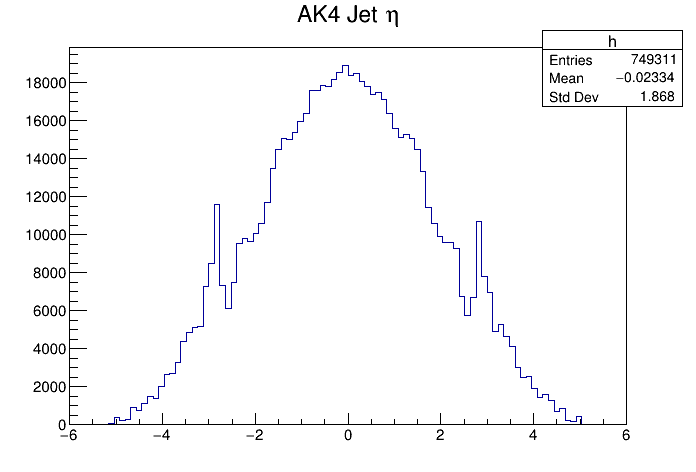

In [33]:
h.Draw()
c.Draw() 

## `RDataFrame` for AK4 Jet $\phi$

**To-do**: Plot the distribution of jet $\phi$

**Requirement**: the histogram should range from -2 to 2 and have 10 bins

**Documentation** of relavent functions: https://root.cern/doc/master/classROOT_1_1RDataFrame.html

Import relavent package (hint: ROOT)

In [34]:
import ROOT

Load TTree into a RDataFrame (aka create a RDataFrame with the content in TTree)

In [37]:
df = ROOT.RDataFrame("Events", "data.root")

Check the column names

In [41]:
print(df.GetColumnNames())

{ "CaloMET_phi", "CaloMET_pt", "CaloMET_sumEt", "ChsMET_phi", "ChsMET_pt", "ChsMET_sumEt", "CorrT1METJet_area", "CorrT1METJet_eta", "CorrT1METJet_muonSubtrFactor", "CorrT1METJet_phi", "CorrT1METJet_rawPt", "DeepMETResolutionTune_phi", "DeepMETResolutionTune_pt", "DeepMETResponseTune_phi", "DeepMETResponseTune_pt", "Electron_charge", "Electron_cleanmask", "Electron_convVeto", "Electron_cutBased", "Electron_cutBased_HEEP", "Electron_dEscaleDown", "Electron_dEscaleUp", "Electron_dEsigmaDown", "Electron_dEsigmaUp", "Electron_deltaEtaSC", "Electron_dr03EcalRecHitSumEt", "Electron_dr03HcalDepth1TowerSumEt", "Electron_dr03TkSumPt", "Electron_dr03TkSumPtHEEP", "Electron_dxy", "Electron_dxyErr", "Electron_dz", "Electron_dzErr", "Electron_eCorr", "Electron_eInvMinusPInv", "Electron_energyErr", "Electron_eta", "Electron_hoe", "Electron_ip3d", "Electron_isPFcand", "Electron_jetIdx", "Electron_jetNDauCharged", "Electron_jetPtRelv2", "Electron_jetRelIso", "Electron_lostHits", "Electron_mass", "Elect

Fill a histogram with the desired branch

- Requirement: the histogram should range from -2 to 2 and have 10 bins

In [44]:
h_phi = ROOT.TH1D("h_phi","AK4 Jet #phi", 10, -2, 2)
nEntries = t.GetEntries() # this is taking all the entries from the tree

for i in range(nEntries):  # for loop; for every element in the range of nEntries
    if(t.GetEntry(i)>0): # if the index of the entries is greater than zero do the following
        for j in range(len(t.Jet_phi)): # Loop through all the jets in each event
             h_phi.Fill(t.Jet_phi[j]) # filling the histogram with the Jet_eta data

Warning in <TFile::Append>: Replacing existing TH1: h_phi (Potential memory leak).


Plot histogram

In [45]:
%jsroot on
c_phi=ROOT.TCanvas()
h_phi.Draw()
c_phi.Draw()

## `Hist` for Jet $p_T$

**To-do**: Plot the distribution of Jet $p_T$

**Requirement**: the histogram should range from 0 to 500 and have 500 bins

**Link to Uproot tutorial**: 
https://hsf-training.github.io/hsf-training-scikit-hep-webpage/

Import relavent packages (hint: Hist from hist, awkward, uproot)

In [59]:
import uproot
import awkward as ak
import matplotlib.pyplot as plt
import hist

Load data.root data into a variable with uproot

In [51]:
file = uproot.open("data.root")
tree = file["Events"]
print(type(tree))
print(tree)

<class 'uproot.models.TTree.Model_TTree_v20'>
<TTree 'Events' (1347 branches) at 0x7fcb406a0f70>


Use the .array() method to extract Jet_pt data with library='ak'. Search for Jet_pt in 'Events' TTree

In [52]:
Jet_pt = tree["Jet_pt"].array(library ="ak")

Flatten the Jet_pt data

In [56]:
Flat = ak.ravel(Jet_pt)
print(Flat)

[314, 217, 87.4, 28, 23, 20.4, 15.1, ..., 40.8, 30.1, 21.5, 18.4, 487, 482]


Create, fill and plot a histogram:
- Requirement: the histogram should range from 0 to 500 and have 500 bins

/cvmfs/cms.cern.ch/el9_amd64_gcc12/external/py3-numpy/1.24.3-a3a65cbc18c6a98e06451d4329e3ea47/lib/python3.9/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/cvmfs/cms.cern.ch/el9_amd64_gcc12/external/py3-numpy/1.24.3-a3a65cbc18c6a98e06451d4329e3ea47/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fcb2e293f40>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

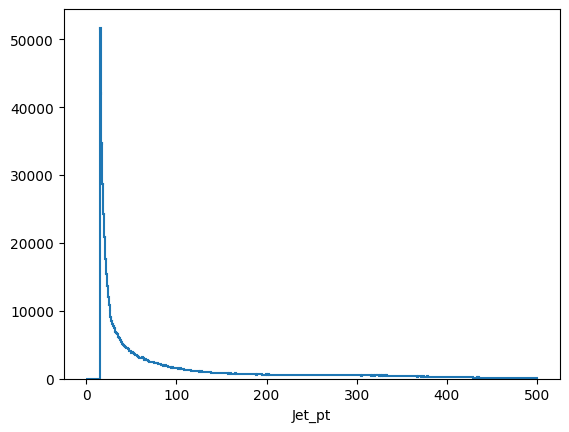

In [61]:
h = hist.Hist(hist.axis.Regular(500, 0, 500, name="Jet_pt"))
h.fill(Flat)
h.plot()

## `Matplotlib` for AK4 Jet mass

This is probably the longest method of making plots with our data. So we've provided detailed instructions and starter code. 

Reuse the code from the Hist section i.e. :

1. Open the file with uproot
2. Get the Jet_mass branch and get the awkard array.
3. Make the histogram by flattening and using `<myhist>.fill()`. *However this time do not use `<myhist>.plot()`*.

`Hist` calls `matplotlib.pyplot` internally and allows you to make quick plots. Now that you were able to plot the histogram with hist objects in the past section, it is your turn to make it look pretty.

**To Do**

Instead of using the `hist.Hist.plot1d()` to plot the histogram we are going to use the `<myhist>.to_numpy()` to get the bin edges and bin contents like `np.histogram()` would normally return.

**Requirements**:

1. Make the histogram filled with red color
1. Add a legend
1. Set the y-scale to "log"
1. Add a title at the top of the plot that says "Jet Mass Distribution"
1. Add a label on the x axis that says "Jet Mass [GeV]"
1. Set the words "Count" as the y axis label

**HINT**

Use google for adding stuff in matplotlib. Take this code as a starting point.
```python
# In order to use bin edges from a pre-binned histogram you need to do the following
fig, ax = plt.subplots()
values , edges = <myhist>.to_numpy()
ax.hist(x = edges[:-1], bins = edges, weights = values)
# where values and edges come from the output of <myhist>.to_numpy()

plt.show()
```

**Optional**

If you haven't heard about it, try out `mplhep`. If it's not avaialable, install it with `pip install mplhep` and use the following

```python
import mplhep as hep
hep.style.use("CMS")
```

This will now make your plots look nicer and closer to publication style!

For extra points try to add the *CMS Experiment* label at the top with `mplhep`. (Google is your friend!!)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import uproot
import hist
import awkward as ak

Reuse the code from the `Hist` section.

In [70]:
tree.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
run                  | uint32_t                 | AsDtype('>u4')
luminosityBlock      | uint32_t                 | AsDtype('>u4')
event                | uint64_t                 | AsDtype('>u8')
nboostedTau          | uint32_t                 | AsDtype('>u4')
boostedTau_charge... | float[]                  | AsJagged(AsDtype('>f4'))
boostedTau_eta       | float[]                  | AsJagged(AsDtype('>f4'))
boostedTau_leadTk... | float[]                  | AsJagged(AsDtype('>f4'))
boostedTau_leadTk... | float[]                  | AsJagged(AsDtype('>f4'))
boostedTau_leadTk... | float[]                  | AsJagged(AsDtype('>f4'))
boostedTau_mass      | float[]                  | AsJagged(AsDtype('>f4'))
boostedTau_neutra... | float[]                  | AsJagged(AsDtype('>f4'))
boostedTau_phi       | float[]                  | AsJ

Use the starter code to extract the bin contents and the bin edges from the `hist` histogram you've made and plot a histogram with matplotlib.

Remember to meet the requirements above.

In [ ]:
# Make the histogram filled with red color
# Add a legend
# Set the y-scale to "log"
# Add a title at the top of the plot that says "Jet Mass Distribution"
# Add a label on the x axis that says "Jet Mass [GeV]"
# Set the words "Count" as the y axis label

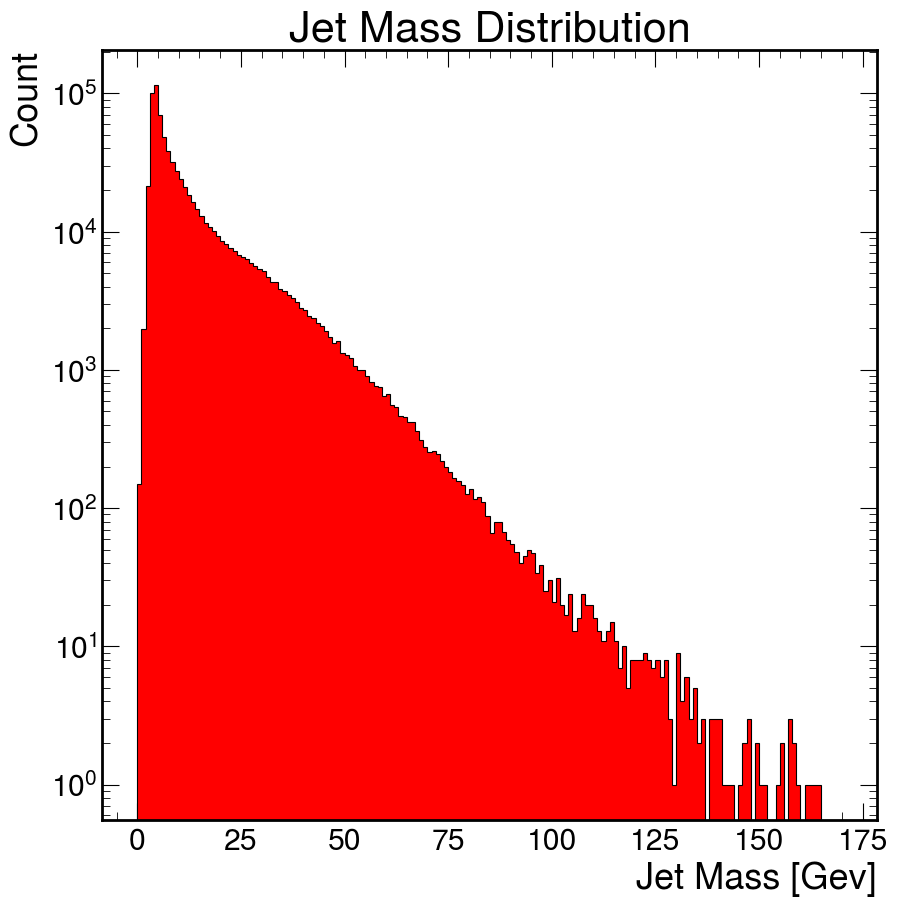

In [100]:
import mplhep as hep
hep.style.use("CMS")

file = uproot.open('data.root')
t = file['Events;1']
Jet_mass = t["Jet_mass"].array(library ="ak")
h2 = hist.Hist(hist.axis.Regular(170, 0, 170, label = "jet mass"))
h2.fill(ak.ravel(Jet_mass))  # this was a lowercase Jet_mass instead of uppercase
hist_data, bin_edges = h2.to_numpy()
plt.hist(bin_edges[:-1], bin_edges, weights = hist_data, histtype= 'step', edgecolor = 'black', color = 'red', fill ='red', linewidth = 0.8, log=True)
plt.title('Jet Mass Distribution')
plt.xlabel('Jet Mass [Gev]')
plt.ylabel('Count')
plt.show()

hep.style.use("CMS")


0.0

In [ ]:
'''Jet_mass = tree["Jet_mass"].array(library ="ak")
Flat = ak.ravel(Jet_mass)
print(Flat)

plt.hist()
plt.yscale('log')
plt.title("Jet Mass Dist.")
plt.xlabel("Jet mass[GeV]")
plt.ylabel('Count')
plt.fill('red')
h.plot()'''

In [73]:
Flat

<Array [34.9, 32.5, 12.4, 5.59, ..., 4.56, 45.7, 68.6] type='749311 * float32'>

If all goes well you should have something like below (after using `mplhep`)

![jetmass.png](jetmass.png)
